In [1]:
import sys
sys.path.append("..")

import os
import torch
import h5py
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, Subset

from dsvit.dataset import BrainTumorDataset
from collections import defaultdict

In [8]:
import h5py
import numpy as np

cvind_path = '/Users/darshdave/Documents/BRAINTUMOR/DATASET/cvind.mat'

with h5py.File(cvind_path, 'r') as f:
    split_labels = np.array(f['cvind']).squeeze().astype(int)

# Get indices for each split
train_ids = np.where(split_labels == 1)[0]
val_ids   = np.where(split_labels == 2)[0]
test_ids  = np.where(split_labels == 3)[0]

print(f"Train: {len(train_ids)}, Val: {len(val_ids)}, Test: {len(test_ids)}")


Train: 542, Val: 679, Test: 572


In [9]:
base_dataset = BrainTumorDataset(root_dir="/Users/darshdave/Documents/BRAINTUMOR/DATASET/FILES/")

train_dataset = Subset(base_dataset, train_ids)
val_dataset = Subset(base_dataset, val_ids)
test_dataset = Subset(base_dataset, test_ids)

In [10]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [11]:
classes = {1: 'Meningioma', 2: 'Pituitary', 3: 'Glioma'}

In [12]:
def visualize_batch(batch, labels, title="Batch"):
    fig, axes = plt.subplots(1, len(batch), figsize=(15, 4))
    fig.suptitle(title)
    for i in range(len(batch)):
        axes[i].imshow(batch[i][0], cmap='gray')
        axes[i].set_title(f"Label: {classes.get(int(labels[i].item()), '?')}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
train_batch = next(iter(train_loader))
val_batch = next(iter(val_loader))
test_batch = next(iter(test_loader))


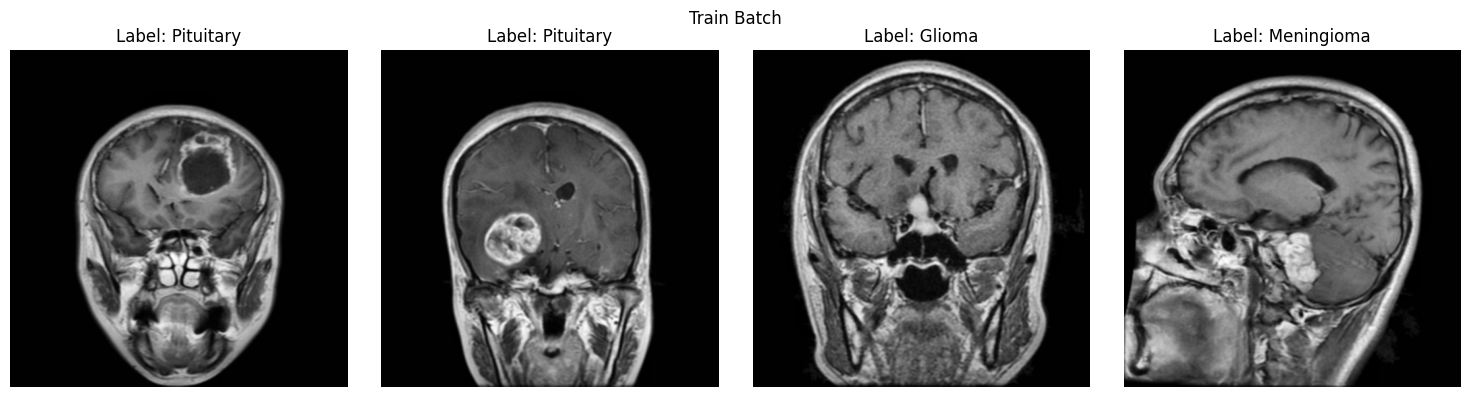

In [14]:
visualize_batch(train_batch[0], train_batch[1], "Train Batch")

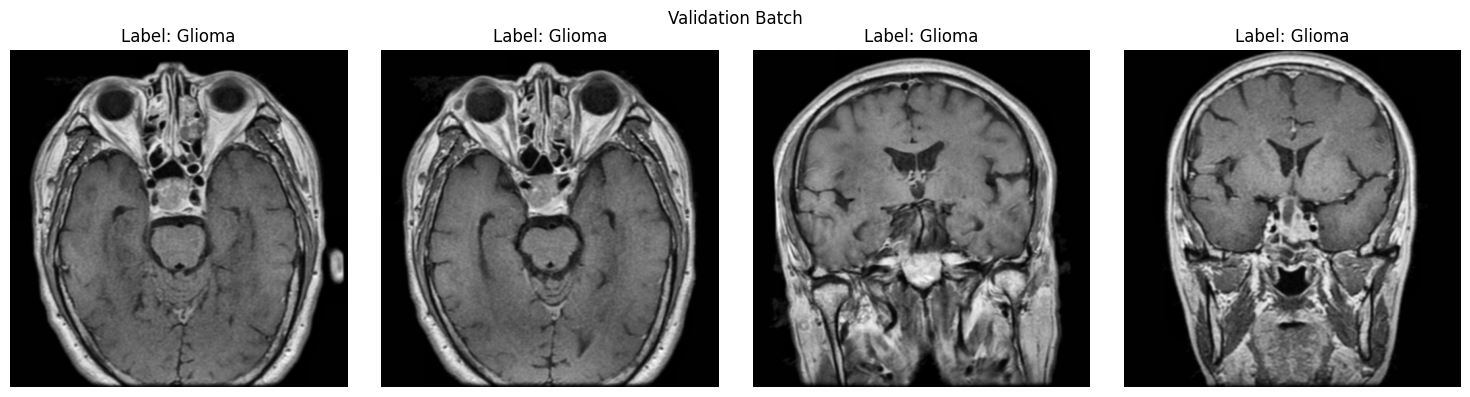

In [15]:
visualize_batch(val_batch[0], val_batch[1], "Validation Batch")

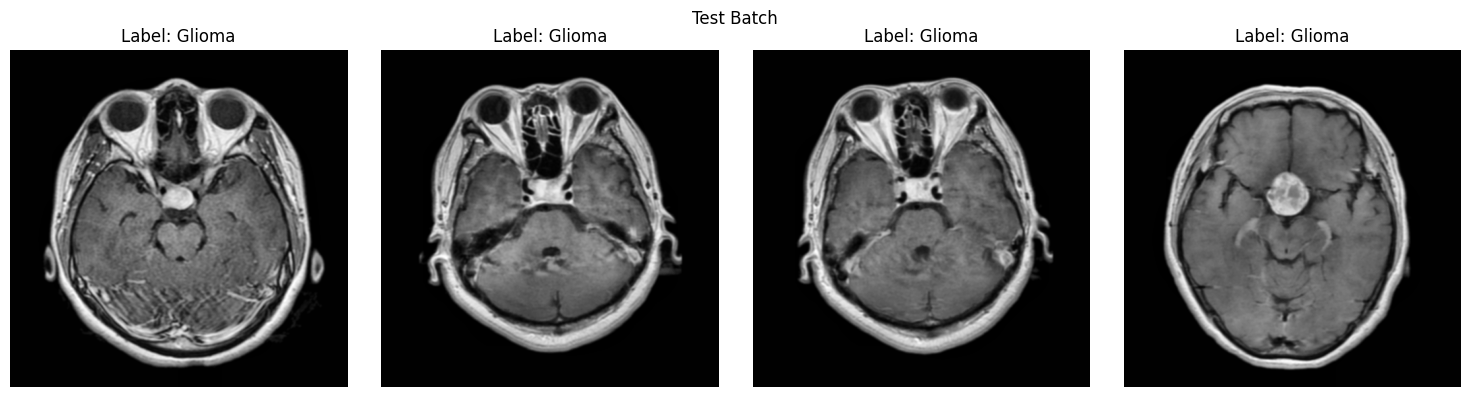

In [16]:
visualize_batch(test_batch[0], test_batch[1], "Test Batch")